# SR-Dyna (Novel Revaluation Task)

In [58]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import srdyna
import importlib
import matplotlib.animation as manimation

In [59]:
importlib.reload(srdyna)

<module 'srdyna' from '/Users/jeremygordon/repos/sr-dyna/srdyna.py'>

Loaded 10x10 world with 103 states


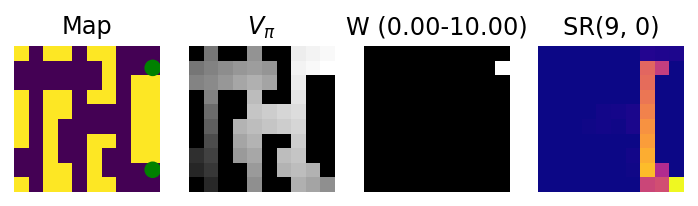

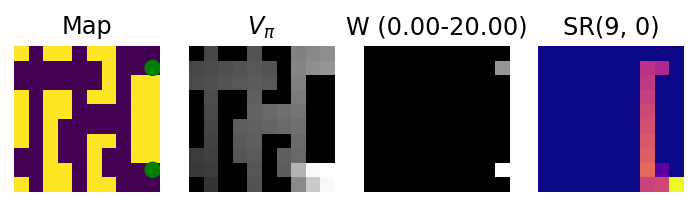

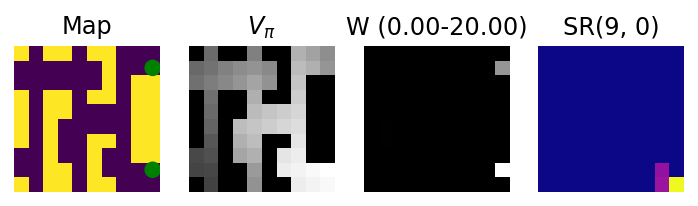

In [60]:
# Latent Learning
REPLAY = "sufficient"
EXPLORE_STEPS = 25000
S1_S2_TRIALS = 20
POST_REWARD_STEPS = 40
REPLAY_STEPS = {
    "insufficient": 10,
    "sufficient": 10000
}[REPLAY]
S1_LOC = (0, 2)
S2_LOC = (8, 1)
env = srdyna.SimpleGridWorld(world='worlds/latent_learning.txt', max_reward_locs=2)
agent = srdyna.SRDyna(id=0, loc=(0, 2), env=env)

R1_LOC = (9, 8)
R2_LOC = (9, 1)
env.add_reward(R1_LOC, 0)  # Initially empty, but terminates
env.add_reward(R2_LOC, 0)  # Initially empty, but terminates

# Explore
for i in range(EXPLORE_STEPS):
    agent.step(random_policy=True)

# Add reward
env.reward_locs[R1_LOC]['reward'] = 10  

for i in range(POST_REWARD_STEPS):
    # Repeated one-step runs from R1
    agent.terminate_episode(reset_state=env.state_at_loc(R1_LOC))
    agent.step(verbose=False)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=9)

# Trials from S1 or S2 (until R1 reached)
for i in range(S1_S2_TRIALS):
    s_loc = S1_LOC if i % 2 == 0 else S2_LOC
    agent.terminate_episode(reset_state=env.state_at_loc(s_loc))
    done = False
    steps = 0
    MAX_STEPS = 1000
    while not done and steps < MAX_STEPS:
        done = agent.step(verbose=False)
        steps += 1
        
# Increase second reward
env.reward_locs[R2_LOC]['reward'] = 20  

# Learn about R2 - repeated one-step runs from R2
for i in range(POST_REWARD_STEPS):
    agent.terminate_episode(reset_state=env.state_at_loc(R2_LOC))
    agent.step(verbose=False)

agent.make_plots(sr_state=9)

# One-step replay samples from random sa's
agent.learn_offline(k=REPLAY_STEPS)
    
agent.make_plots(sr_state=9)

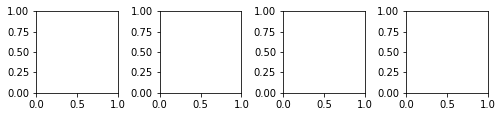

In [61]:
# Generate anim (slow)
agent.record_trials(title="novel_revaluation", 
                    learning=False,
                    start_locs=[(0, 2), (4, 0), (9, 0), (0, 8)])